<a href="https://colab.research.google.com/github/ichwansh03/Naive-Bayes-Classification/blob/main/%5BTesting%5D_Penentuan_Keaktifan_Kader_UKM_Islam_2021_Menggunakan_Algoritma_NaiveBayes_dan_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install jcopml

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [ ]:
dataset = pd.read_csv('/content/Dataset_Ichwan Sholihin_19312131.csv')


### Classification Report

In [ ]:
#1 = Aktif, 0 = Tidak Aktif
X = np.array(dataset[["rata_rata"]])
y = np.array(dataset[["status_keaktifan"]])

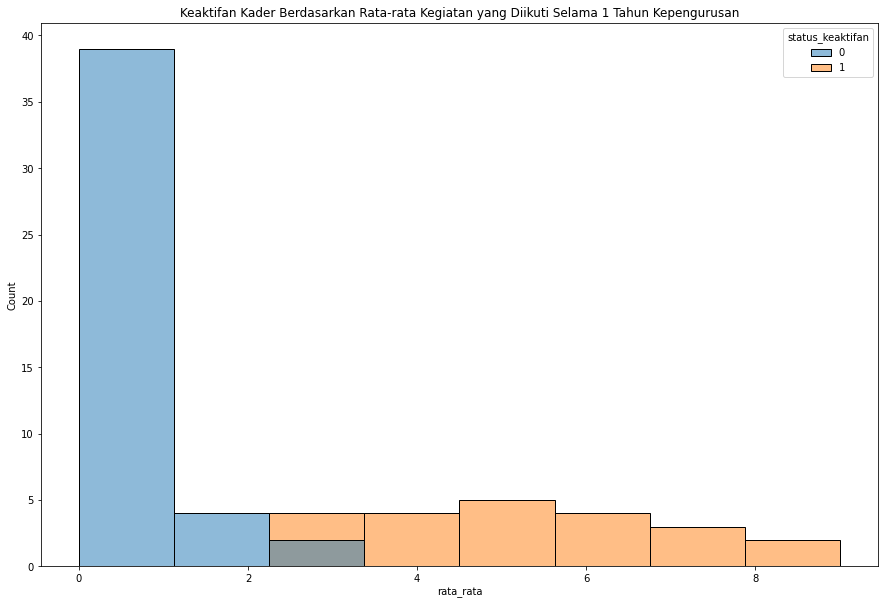

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Keaktifan Kader Berdasarkan Rata-rata Kegiatan yang Diikuti Selama 1 Tahun Kepengurusan")
sns.histplot(x="rata_rata", hue="status_keaktifan", data=dataset)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((53, 1), (14, 1), (53, 1), (14, 1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.67      0.80         3

    accuracy                           0.93        14
   macro avg       0.96      0.83      0.88        14
weighted avg       0.93      0.93      0.92        14



### StandardScaler

In [ ]:
x = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
#param[outbond,pelatihan,mabit_jalasah,mentoring,kepanitiaan,rata_rata]
print(classifier.predict(sc.transform([[5,5,5,5,5,5.0]])))

[1]


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  2]
 [ 0  4]]


0.8823529411764706

### JCOPML

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53, 6), (14, 6), (53,), (14,))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["outbond","pelatihan","mabit_jalasah","mentoring","kepanitiaan"]),
    ('categoric', cat_pipe(encoder='onehot'), ['status_keaktifan']),
])

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [ ]:
pipeline.fit(X_train, y_train)

ValueError: ignored

In [ ]:
pipeline.score(X_train, y_train)

0.9166666666666666

In [ ]:
pipeline.score(X_test, y_test)

1.0

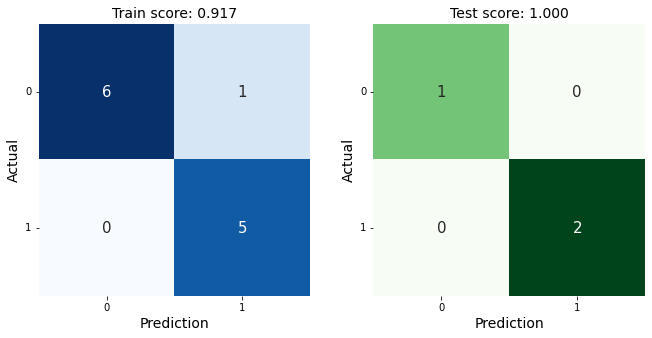

In [ ]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)